In [3]:
# I was having trouble understanding the EMD to do Card Abstraction, so I was making this notebook to better understand

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import ot
import time

In [5]:
# The distance to move is independent of what the actual values are. Think about it this way: it's how much you need to walk to move something, not how much weight you are actually carrying.
n = 5  # number of bins
pos_a = np.array([[i] for i in range(n)])
pos_b = np.array([[i] for i in range(n)])

C = ot.dist(pos_a, pos_b, metric='euclidean')
def plot_cost(C):
	plt.figure(figsize=(12,7))
	ax = plt.subplot(131)
	im = plt.imshow(C, cmap='coolwarm')
	plt.title('Cost Matrix')
	cbar = plt.colorbar(im, ax=ax, shrink=0.5, use_gridspec=True)
	cbar.ax.set_ylabel("cost", rotation=-90, va="bottom")

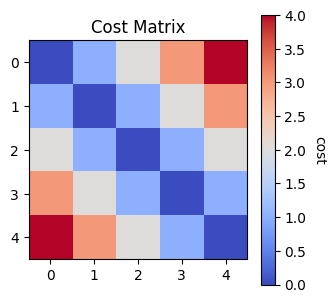

In [6]:
plot_cost(C)

Cost: 4.0


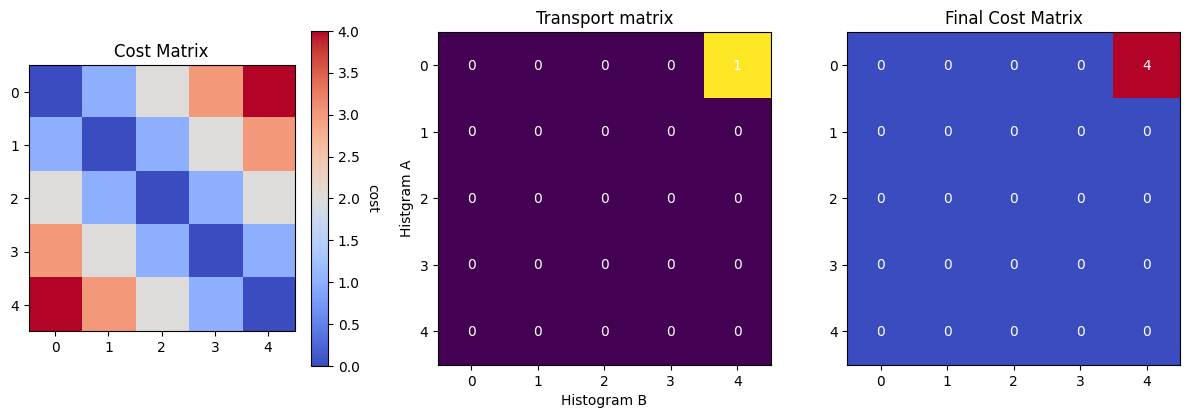

In [7]:
plot_cost(C)
# 1 vs 1. Sample
a_hist = np.array([1.0,0,0,0,0])
b_hist = np.array([0,0,0,0,1.0])
ot_emd = ot.emd(a_hist, b_hist, C)
ax = plt.subplot(132)
im = plt.imshow(ot_emd)
for i in range(n):
    for j in range(n):
        text = ax.text(j, i, '{0:g}'.format(ot_emd[i, j]),
                       ha="center", va="center", color="w")
plt.title('Transport matrix')
plt.xlabel('Histogram B')
plt.ylabel('Histgram A')
plt.tight_layout()
# The cost would be how much you are transporting for each, multipled by the original cost matrix

ax =plt.subplot(133)
transport_cost_matrix = ot_emd * C
plt.imshow(transport_cost_matrix, cmap='coolwarm')
for i in range(n):
    for j in range(n):
        text = ax.text(j, i, '{0:g}'.format(transport_cost_matrix[i, j]),
                       ha="center", va="center", color="w")

plt.title('Final Cost Matrix')
print(f'Cost: {transport_cost_matrix.sum()}')

In [ ]:
def plot_equity_hist(equity_hist, player_cards=None, community_cards=None):
	"""Plot the equity histogram.
	"""
	plt.clf() # Clear Canvas
	plt.hist([i/len(equity_hist) for i in range(len(equity_hist))],[i/len(equity_hist) for i in range(len(equity_hist)+1)], weights=equity_hist)
	plt.ylabel("Probability Mass")
	plt.xlabel("Equity Interval")
	if player_cards:
		player_string = "\nPlayer Cards: " + str(player_cards)
	else:
		player_string = ""
	
	if community_cards:
		community_string = "\nCommunity Cards: " + str(community_cards)
	else:
		community_string = ""

	plt.title("Equity Distribution" + player_string + community_string)
	plt.show(block=False) # to plot graphs consecutively quickly with non-blocking behavior
	plt.pause(0.2)

: 

: 

: 

In [8]:

import sys
import joblib
import os
sys.path.append("../")
from abstraction import get_filenames, kmeans, kmeans_predict

In [9]:

stage = "turn"
raw_dataset_filenames = get_filenames(f'../data/raw/{stage}')
sorted(raw_dataset_filenames)
filename = raw_dataset_filenames[0] # Take the smallest file

equity_distributions = np.load(f'../data/raw/{stage}/{filename}')
if not os.path.exists(f'../data/clusters/{stage}/{filename}'):
	print(f"Generating the cluster for the {stage}")
	cluster_indices, centroids = kmeans(equity_distributions, n_clusters=10) # Perform Clustering
	joblib.dump(centroids, f'../data/clusters/{stage}/{filename}')
else: # Centroids have already been generated, just load them, which are tensors
	centroids = joblib.load(f'../data/clusters/{stage}/{filename}')


sorted_centroids = centroids[centroids[:, 0].argsort()]
cluster_indices = kmeans_predict(equity_distributions,  centroids)
print(sorted_centroids)


predicting on cpu..
device is :cpu
tensor([[2.9565e-06, 1.0033e-03, 7.8028e-03, 6.9243e-02, 9.2195e-01],
        [4.5980e-05, 1.4184e-03, 4.6433e-02, 3.5198e-01, 6.0012e-01],
        [2.0309e-03, 1.3001e-02, 1.7164e-01, 6.3204e-01, 1.8128e-01],
        [5.5205e-03, 1.2124e-01, 5.7220e-01, 1.9696e-01, 1.0408e-01],
        [1.9613e-02, 4.9778e-01, 3.2355e-01, 6.5327e-02, 9.3736e-02],
        [1.1683e-01, 6.3076e-01, 1.1129e-01, 6.7004e-02, 7.4122e-02],
        [3.9737e-01, 4.1392e-01, 5.1651e-02, 6.7828e-02, 6.9236e-02],
        [6.4700e-01, 5.3450e-02, 6.2953e-02, 6.6301e-02, 1.7029e-01],
        [6.5607e-01, 1.8862e-01, 6.0846e-02, 7.1508e-02, 2.2964e-02],
        [8.1963e-01, 4.0152e-02, 6.9028e-02, 4.5486e-02, 2.5702e-02]])


The above method is still too slow in code, let us try parallelizing using a Sinkhorn solver.

In [10]:
import torch
from geomloss import SamplesLoss

In [11]:
loss = SamplesLoss("sinkhorn")

In [12]:
equity_distributions = torch.tensor(equity_distributions, dtype=torch.float64)
centroids = torch.tensor(centroids, dtype=torch.float64)

/var/folders/7q/rgc3jd8s0ts2hntt2bxjrx440000gn/T/ipykernel_61724/903798868.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  centroids = torch.tensor(centroids, dtype=torch.float64)


In [15]:
loss(centroids, equity_distributions)

: 

: 